# <center><h1>INCOME  PREDICTION</h1><center/>    

### Importing Required Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Overview


## Dataset Description
* The dataset contains 32,561 entries with 15 features related to income prediction
* Features include demographic information (age, workclass, education), employment details (occupation, hours-per-week), and financial metrics (capital-gain, capital-loss)
* The target variable is "Income" (binary classification: <=50K or >50K)
* Contains both numerical (age, fnlwgt, education-num) and categorical (workclass, marital-status) features
* Initial data shows no null values but had 24 duplicate rows that were removed
* The first column was mislabeled as "nan" but represents "age" (renamed during cleaning)


## Checking basic aspects of the dataset 

In [10]:
data = pd.read_csv(r"C:\Users\basim\Downloads\incomeData.csv")

In [11]:
data.head(3)

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [12]:
data.shape

(32561, 15)

In [13]:
data.size

488415

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nan             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
data.dtypes

nan                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

### Checking null values

In [17]:
data.isnull().sum()

nan               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

### There is no null values in this dataset

### Checking Duplicates

In [20]:
data.duplicated().sum()

24

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

0

### Column Names

In [24]:
data.columns

Index(['nan', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

### Rename the nan column to age

In [26]:
data.rename(columns={'nan':'age'},inplace=True)

In [27]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

### Checking numerical description of the dataset

In [29]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Visualisation of correlation matrix of the numerical values

In [31]:
corr_inc = data[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].corr()

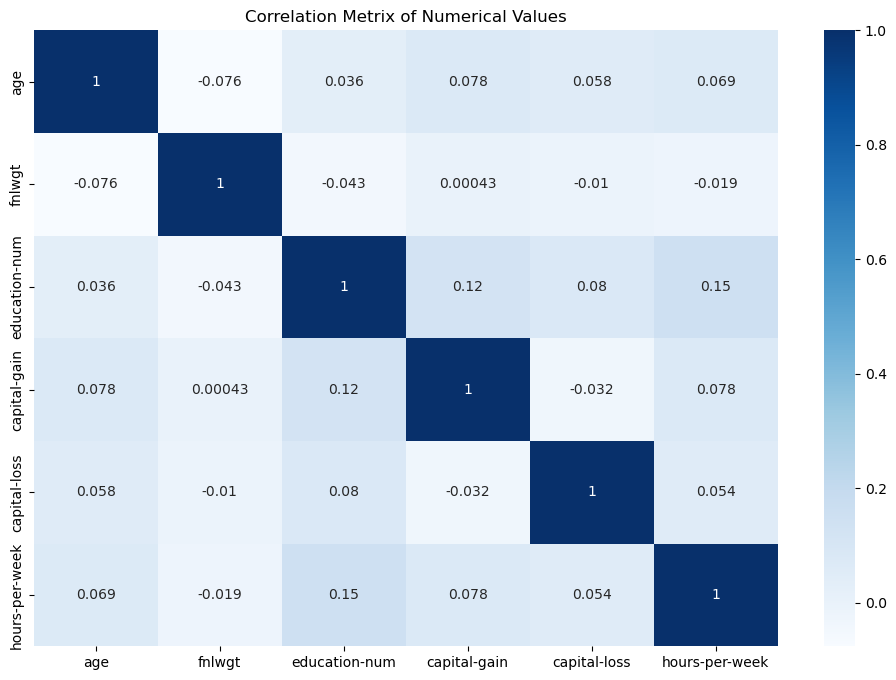

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_inc,cbar=True,annot=True,cmap='Blues') #coolwarm,reds,Blues,greens,viridis
plt.title('Correlation Metrix of Numerical Values')
plt.show()

#### There is no much correlation between any of the numerical features

## Check for error values

In [35]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [36]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [37]:
data['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [38]:
data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [39]:
data['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [40]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [41]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [42]:
data['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [43]:
data['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [44]:
data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [45]:
data['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [46]:
data['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [47]:
data['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [48]:
data['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [49]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are missing values in three columns ['workclass'], ['occupation'] and ['native-country']

## Treating the error values

In [52]:
data['workclass'].replace(' ?',np.nan,inplace=True);

In [53]:
data['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [54]:
data['workclass'].isnull().sum()

1836

In [55]:
data['workclass'].fillna(data['workclass'].mode()[0],inplace=True)

In [56]:
data['workclass'].isnull().sum()

0

In [57]:
data['occupation'].replace(' ?',np.nan,inplace=True);

In [58]:
data['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [59]:
data['occupation'].isnull().sum()

1843

In [60]:
data['occupation'].fillna(data['workclass'].mode()[0],inplace=True)

In [61]:
data['occupation'].isnull().sum()

0

In [62]:
data['native-country'].replace(' ?',np.nan,inplace=True);

In [63]:
data['native-country'].isnull().sum()

582

In [64]:
data['native-country'].fillna(data['workclass'].mode()[0],inplace=True)

In [65]:
data['native-country'].isnull().sum()

0

In [66]:
# Univariate

### Visualize income distribution

In [68]:
data['Income'].value_counts()

Income
<=50K    24698
>50K      7839
Name: count, dtype: int64

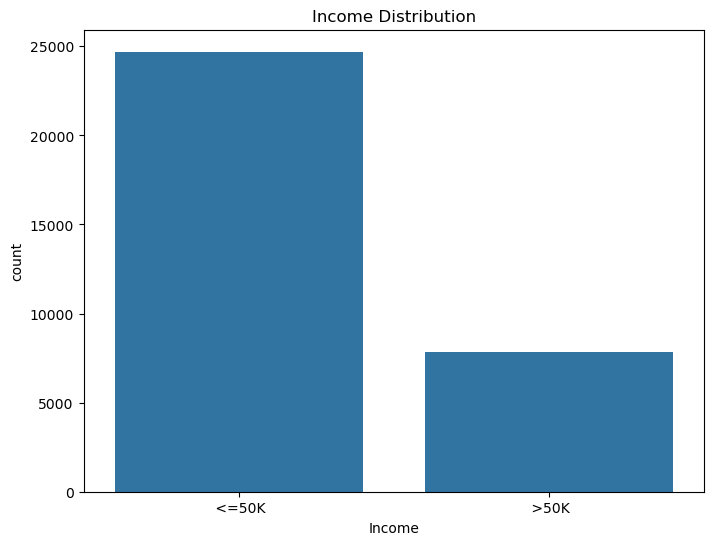

In [69]:
plt.figure(figsize=(8,6))
sns.countplot(x='Income',data=data)
plt.title('Income Distribution')
plt.show()

#### The dataset is imbalanced with significantly more individuals earning <=50K compared to >50K.

In [71]:
#bi variate

### Age Distribution by Income

In [73]:
data.groupby('Income')['age'].mean()

Income
<=50K    36.787392
>50K     44.250925
Name: age, dtype: float64

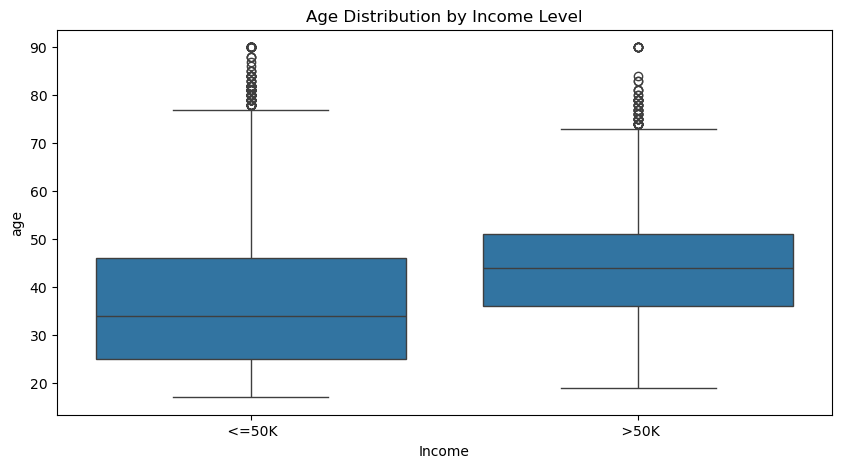

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Income' , y='age' , data=data)
plt.title('Age Distribution by Income Level')
plt.show()

####  Higher income earners tend to be older on average.

### Categorizing Income in to high income and low income

In [77]:
data['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [78]:
high_income = data[data['Income']==' <=50K']

In [79]:
low_income = data[data['Income']==' >50K']

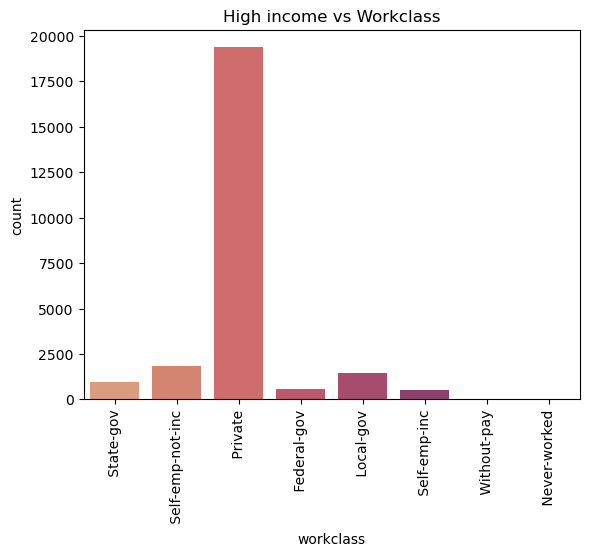

In [80]:
sns.countplot(x='workclass',data=high_income,palette='flare')
plt.title('High income vs Workclass')
plt.xticks(rotation=90)
plt.show()

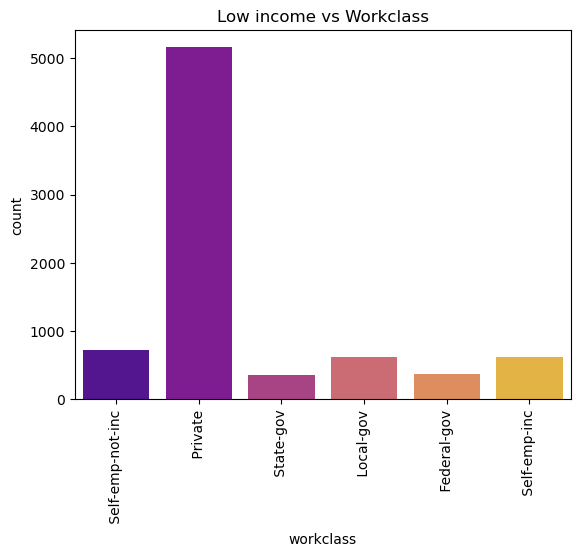

In [81]:
sns.countplot(x='workclass',data=low_income, palette='plasma')
plt.title('Low income vs Workclass')
plt.xticks(rotation=90)
plt.show()

#### Both income >50K and <=50K work in private sector
most of the people work in private sector, but most of the people who work in private sector earns income <=50K.

### Income distribution in gender 

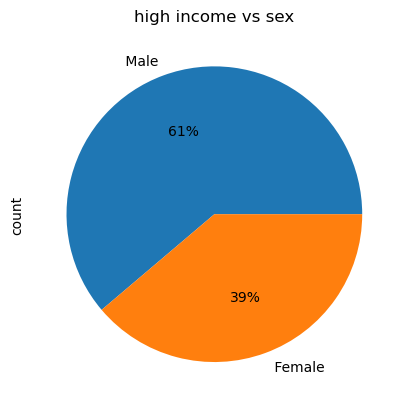

In [84]:
high_income['sex'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('high income vs sex')
plt.show()

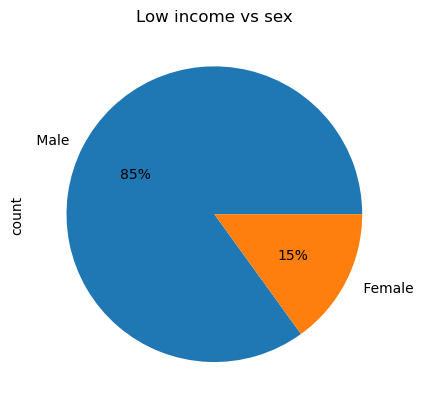

In [85]:
low_income['sex'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.title('Low income vs sex')
plt.show()

#### Most of the people are men No.of men who earns 50K or more income is higher than women
most of the women are earning <=50K

### Education Distribution by Income

In [88]:
#Multi variate

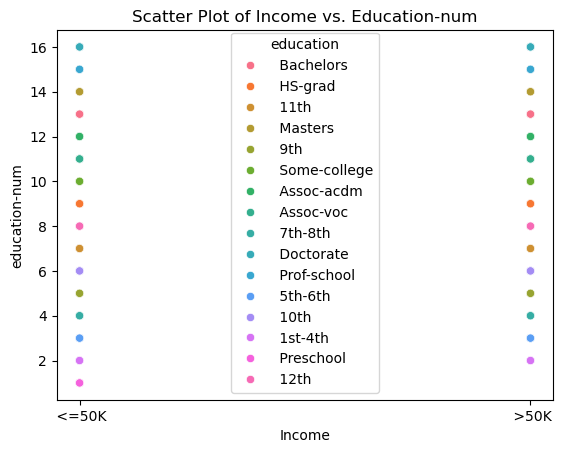

In [89]:
sns.scatterplot(data = data, x ='Income', y ='education-num', hue = 'education')
plt.title('Scatter Plot of Income vs. Education-num')
plt.show()

#### This suggest that education is a significant factor in earning more income.
high earners is education-num >= 12(eg.,  Bachelors, Masters, Doctorate, Prof-school).
Low earners is concendrated by lower education-num(eg., HS-grad, 11th, 9th).
The hue (education) shows clear groupings (e.g., "Bachelors" and "Masters" cluster at higher education-num), reinforcing the link between formal degrees and income.

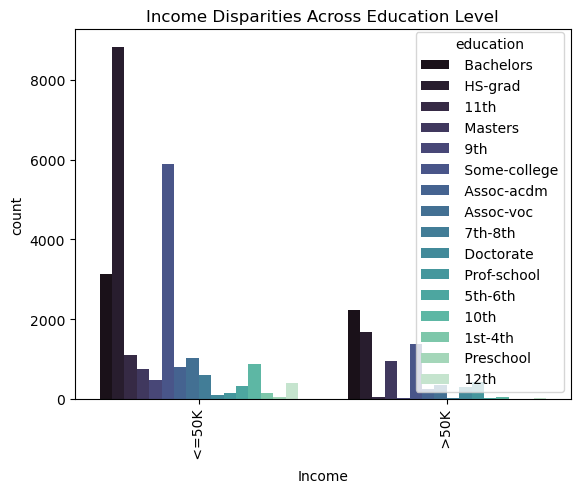

In [91]:
sns.countplot(x='Income',hue='education',palette= 'mako',data=data)
plt.title('Income Disparities Across Education Level')
plt.xticks(rotation=90)
plt.show()

### HS grade dominates lower income group.
people who earn more than 50K has Bachelores.

### Capital Gain by Income and Gender

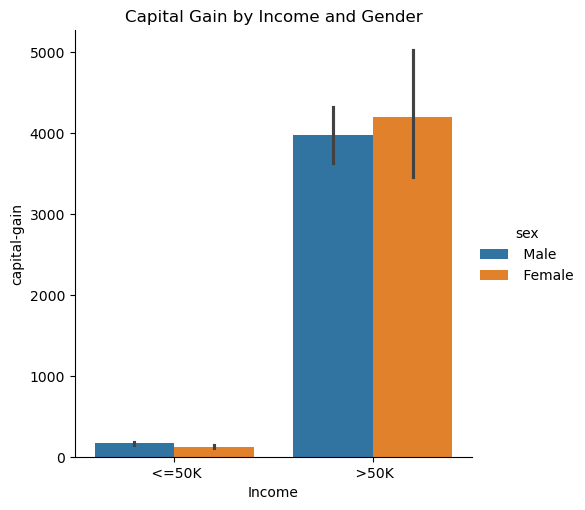

In [94]:
sns.catplot(x='Income' ,y='capital-gain', kind='bar', hue='sex',data=data)
plt.title('Capital Gain by Income and Gender')
plt.show()

#### people who gain more capital gain 
women have more capital gain than men

### Hours Worked per Week by Income Level

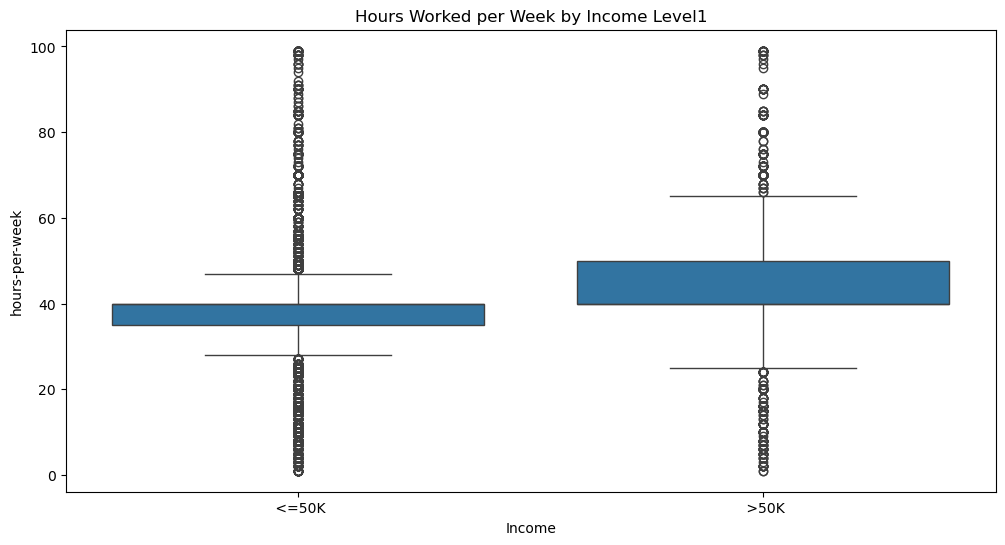

In [97]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Income',y='hours-per-week',data=data)
plt.title('Hours Worked per Week by Income Level1')
plt.show()

#### Those earning >50K tend to work more hours per week on average

### Income Distribution of Among Marital Status

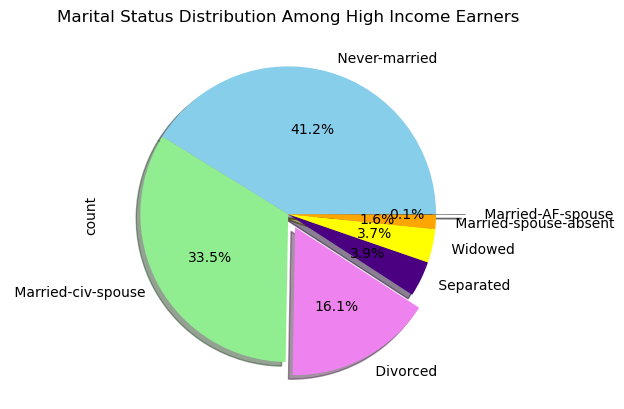

In [100]:
high_income['marital-status'].value_counts().plot(kind='pie',explode=(0,0,0.1,0,0,0,0.2),shadow=True,autopct='%1.1f%%',colors=['skyblue','lightgreen','violet','indigo','yellow','orange','black'])
plt.title('Marital Status Distribution Among High Income Earners')
plt.show()

### This suggest that while marriage correlates with higher income
a significant portion of high earners never married or married civilian spouse

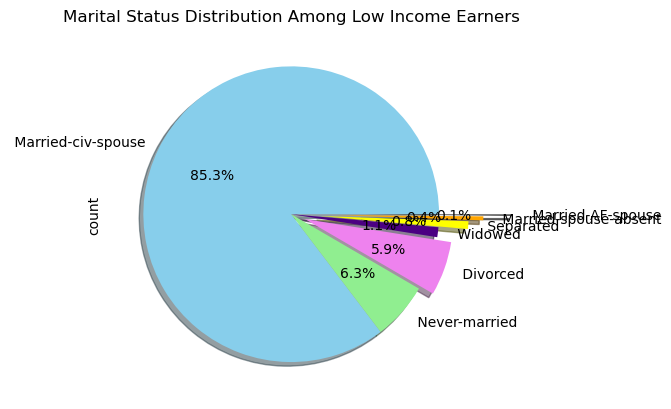

In [102]:
low_income['marital-status'].value_counts().plot(kind='pie',explode=(0,0,0.1,0,0.2,0.3,0.5),shadow=True,autopct='%1.1f%%',colors=['skyblue','lightgreen','violet','indigo','yellow','orange','black'])
plt.title('Marital Status Distribution Among Low Income Earners')
plt.show()

#### Low-income earners are overwhelmingly never-married, indicating that marital status may be a significant socioeconomic factor.

### Overall visualisation of dataset

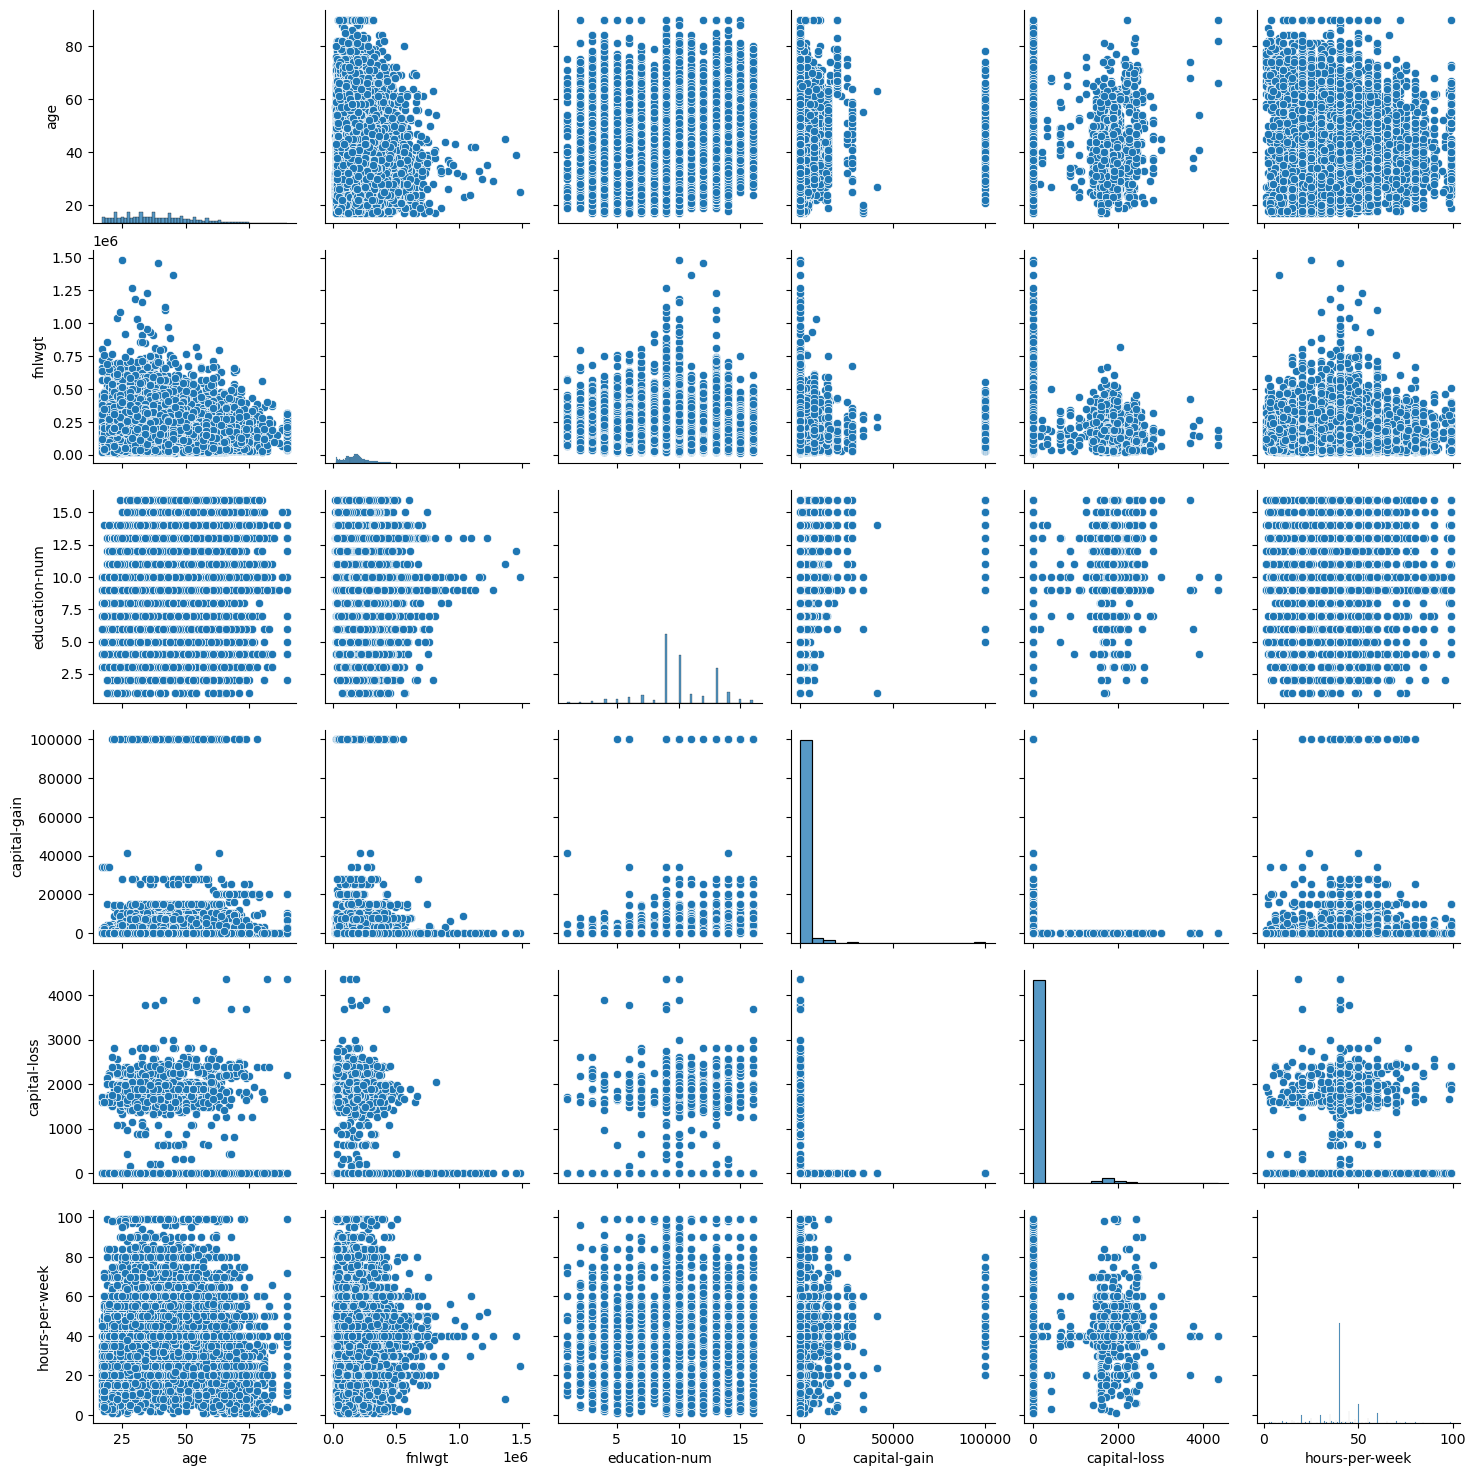

In [105]:
sns.pairplot(data)
plt.show()

### Conclusion
* There is no null values in this dataset.
* There is no much correlation between any of the numerical features.
* There are missing values in three columns ['workclass'], ['occupation'] and ['native-country'].
* The dataset is imbalanced with significantly more individuals earning <=50K compared to >50K.
* Higher income earners tend to be older on average.
*  Both income >50K and <=50K work in private sector
most of the people work in private sector, but most of the people who work in private sector earns income <=50K.
* Most of the people are men No.of men who earns 50K or more income is higher than women
most of the women are earning <=50K.
* High earners is education-num >= 12(eg., Bachelors, Masters, Doctorate, Prof-school). Low earners is concendrated by lower education-num(eg., HS-grad, 11th, 9th). The hue (education) shows clear groupings (e.g., "Bachelors" and "Masters" cluster at higher education-num), reinforcing the link between formal degrees and income.
* People who gain more capital gain
women have more capital gain than men.
* HS grade dominates lower income group.
people who earn more than 50K has Bachelores.
* Those earning >50K tend to work more hours per week on average.
* A significant portion of high earners never married or married civilian spouse.
* Low-income earners are overwhelmingly never-married, indicating that marital status may be a significant socioeconomic factor.